# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [78]:
#Import all the necessary modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [80]:
pima_df = pd.read_csv('pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [81]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [82]:
print(pima_df.dtypes)
print(pima_df.shape)

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [84]:
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
# Finding all the columns where we have value '0' and should not be present
# 4 columns: Plas, Pres , skin and mass should not be zero.  
print(pima_df[pima_df['Plas']==0])
print(pima_df[pima_df['Pres']==0])
print(pima_df[pima_df['skin']==0])
print(pima_df[pima_df['mass']==0])

     Preg  Plas  Pres  skin  test  mass   pedi  age  class
75      1     0    48    20     0  24.7  0.140   22      0
182     1     0    74    20    23  27.7  0.299   21      0
342     1     0    68    35     0  32.0  0.389   22      0
349     5     0    80    32     0  41.0  0.346   37      1
502     6     0    68    41     0  39.0  0.727   41      1
     Preg  Plas  Pres  skin  test  mass   pedi  age  class
7      10   115     0     0     0  35.3  0.134   29      0
15      7   100     0     0     0  30.0  0.484   32      1
49      7   105     0     0     0   0.0  0.305   24      0
60      2    84     0     0     0   0.0  0.304   21      0
78      0   131     0     0     0  43.2  0.270   26      1
81      2    74     0     0     0   0.0  0.102   22      0
172     2    87     0    23     0  28.9  0.773   25      0
193    11   135     0     0     0  52.3  0.578   40      1
222     7   119     0     0     0  25.2  0.209   37      0
261     3   141     0     0     0  30.0  0.761   27     

In [86]:
# Printing the median values for all the columns
print(pima_df['Plas'].median())
print(pima_df['skin'].median())
print(pima_df['Pres'].median())
print(pima_df['mass'].median())

117.0
23.0
72.0
32.0


In [87]:
# replacing the 0 value with median for all the 4 columns 

pima_df['Plas'].replace(0, pima_df['Plas'].median(), inplace =True)
pima_df['Pres'].replace(0, pima_df['Pres'].median(), inplace =True)
pima_df['skin'].replace(0, pima_df['skin'].median(), inplace =True)
pima_df['mass'].replace(0, pima_df['mass'].median(), inplace =True)

# Q5 Print the descriptive statistics of each & every column using describe() function

In [88]:
#Printing the stats for each column
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [89]:

pima_df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

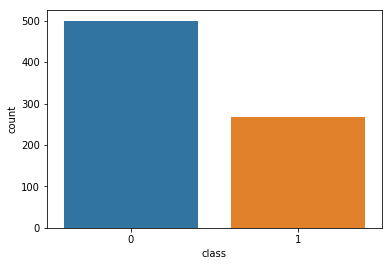

In [90]:
sns.countplot(x='class', data=pima_df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


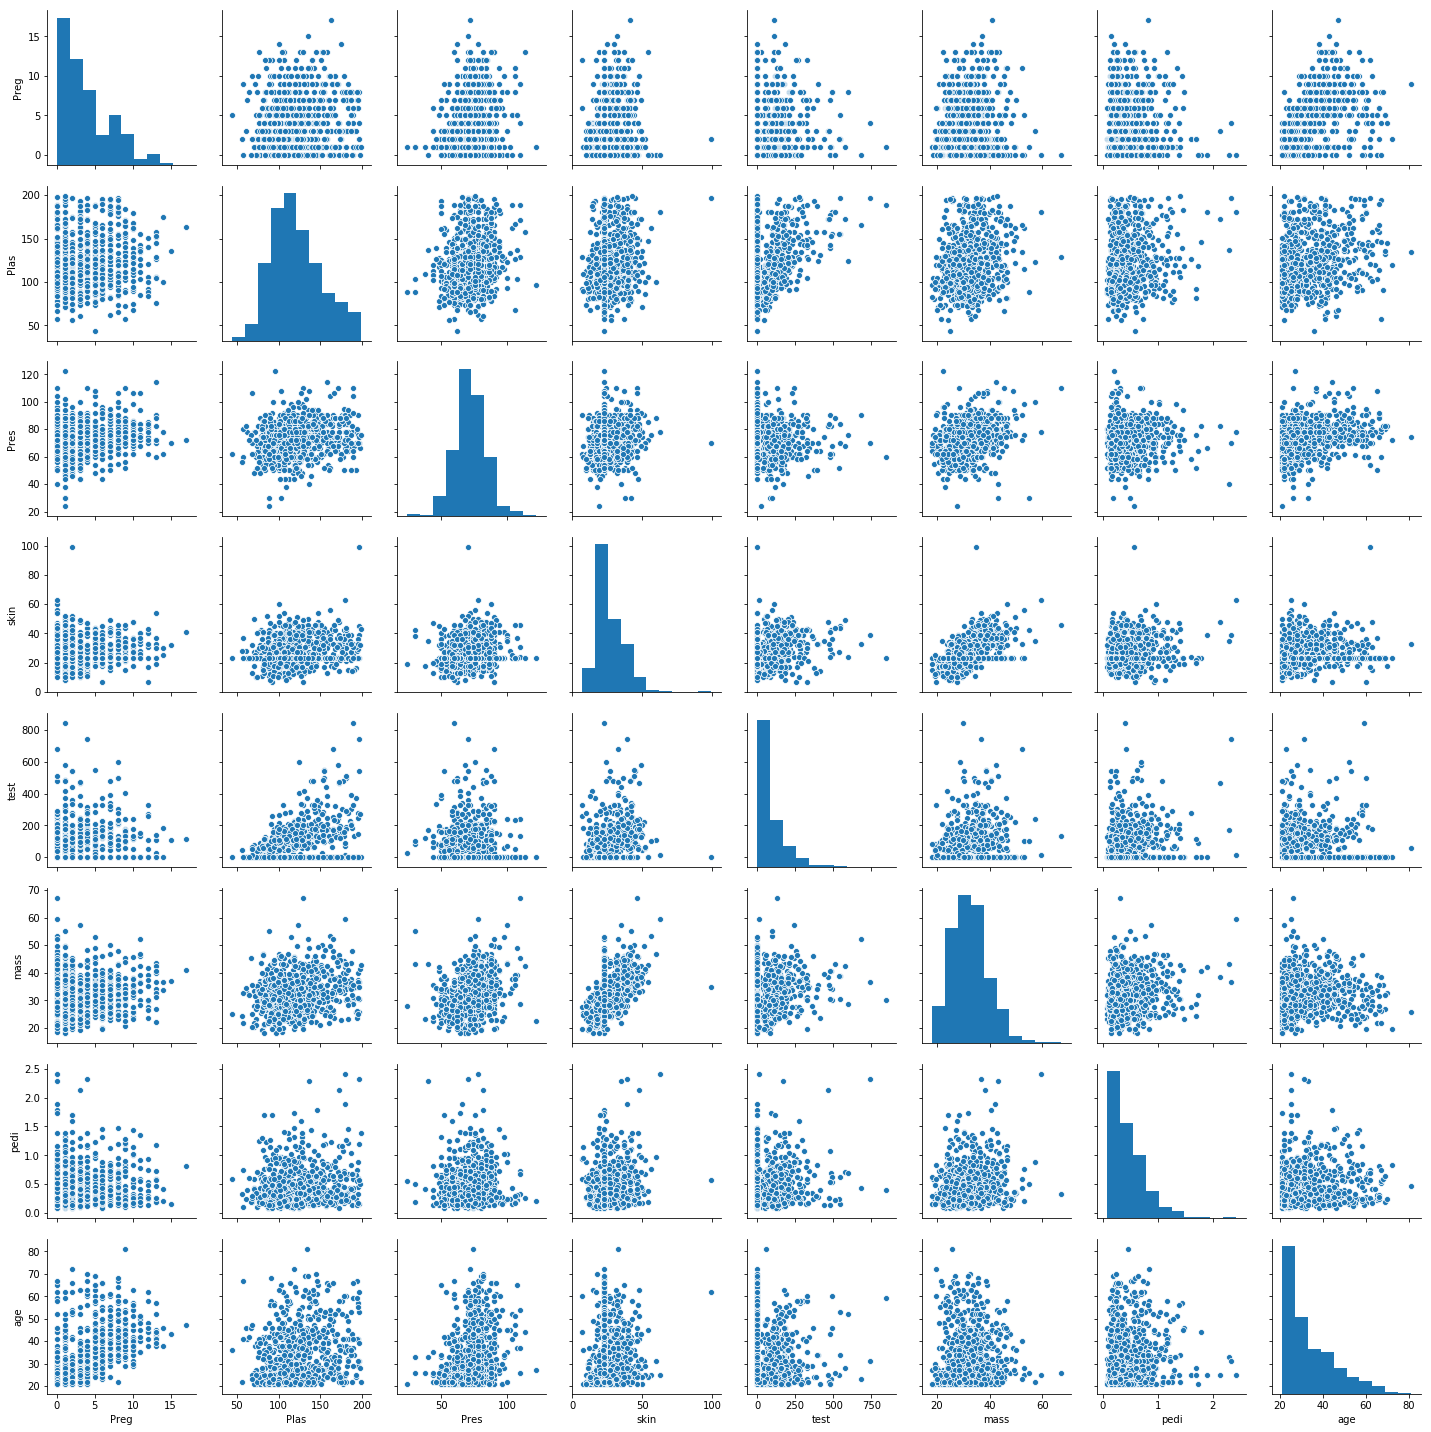

In [91]:
pima_df_attr = pima_df.iloc[:,0:8]
pima_df_attr.head()
sns.pairplot(pima_df_attr)

In [92]:
pima_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.073535,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.331709,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.045769,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.244250,0.546951,0.142977,0.054514,0.189065
test,-0.073535,0.331709,-0.045769,0.244250,1.000000,0.185356,0.185071,-0.042163,0.130548
mass,0.021546,0.231400,0.281132,0.546951,0.185356,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.185071,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.042163,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.130548,0.312249,0.173844,0.238356,1.000000


1) Plasma glucose seems to have positive correlation with diabetes(class) column. 


2) There is still no strong correlation with class column


3) Most of the features have correlation with class columns but not very strong. They seem to influence target column but not very highly.

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [107]:
X= pima_df.drop('class', axis =1)
y = pima_df['class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #70/30 split

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [108]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=1 )
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [109]:
dt_model.score(x_test , y_test)



0.7272727272727273

In [96]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

y_predict = dt_model.predict(x_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[112  34]
 [ 28  57]]


Print the feature importance of the decision model - Optional

In [97]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

           Imp
Preg  0.095985
Plas  0.249866
Pres  0.134809
skin  0.060544
test  0.000000
mass  0.242880
pedi  0.091439
age   0.124477
